<a href="https://colab.research.google.com/github/Mohasg77/monte-calro/blob/master/European_call_option_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * Geometric Brownian Motion*

تعداد شبیه سازی : 100
قیمت اولیه سهم : 100
راندگی : 0.08
نوسان قیمت : 0.3
 بازه زمانی مورد نظر : ماهانه(12)، هفتگی(52) و یا روزانه (365) : 365
نرخ بهره : 0.1


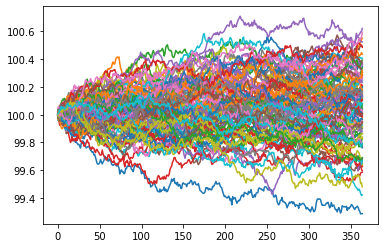

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GeometricBrownianMotion:
  
  def simulate_paths(self):
      while self.T - self.dt > 0:
          dWt = np.random.normal(0, np.sqrt(self.dt))  # حرکت براونی
          dYt = self.drift * self.dt + self.volatility * dWt  # تغییرات قیمت
          self.current_price += dYt  # اعمال تغییرات بر روی قیمت غعلی
          self.prices.append(self.current_price)  # اضافه کردن قیمت جدید
          self.T -= self.dt  # شرط برقراری حلقه
# __init__ تعیین مقادیر تعریف شده در کلاس با استفاده از تابع 
  def __init__(self, initial_price, drift, volatility, dt, T):
      self.current_price = initial_price
      self.initial_price = initial_price
      self.drift = drift
      self.volatility = volatility
      self.dt = dt
      self.T = T
      self.prices = []
      self.simulate_paths()

# ورودی توابع
paths = int(input("تعداد شبیه سازی : "))
initial_price = float(input("قیمت اولیه سهم : "))
drift = float(input("راندگی : "))
volatility = float(input("نوسان قیمت : "))
t = int(input(" بازه زمانی مورد نظر : ماهانه(12)، هفتگی(52) و یا روزانه (365) : "))
rate = float(input("نرخ بهره : "))
dt = 1 / t
T = 1
price_paths = []

# تولید مجموعه ای از مسیر های نمونه ای
for i in range(0, paths):
  price_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)

call_payoffs = []
# مسیر های نمونه ای
for price_path in price_paths:
  plt.plot(price_path)
plt.show()

# *European call option*



In [ ]:
sum_prices_paths = []
max_price_paths = []
for i in range(paths):
  sum_prices_paths.append(GeometricBrownianMotion(initial_price, drift, volatility, dt, T).prices)
  max_price_paths.append(max(sum_prices_paths[i]))
strike = []
for i in range(paths):
  strike.append(paths)

def get_payoff(max_price_paths ,strike):
  payoff = []
  for i in range(paths):
    if max_price_paths[i] > strike[i]:
      payoff.append(max_price_paths[i] - strike[i])
    else:
      payoff.append(0)
  sum_payoff = 0
  for i in range(paths):
    sum_payoff += payoff[i]
  sum_payoff = sum_payoff / paths
  return print("value_zero = " ,sum_payoff * np.exp(rate * T))

get_payoff(max_price_paths , strike)


value_zero =  0.33444287462849914
